# Homework 2

---

## Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}


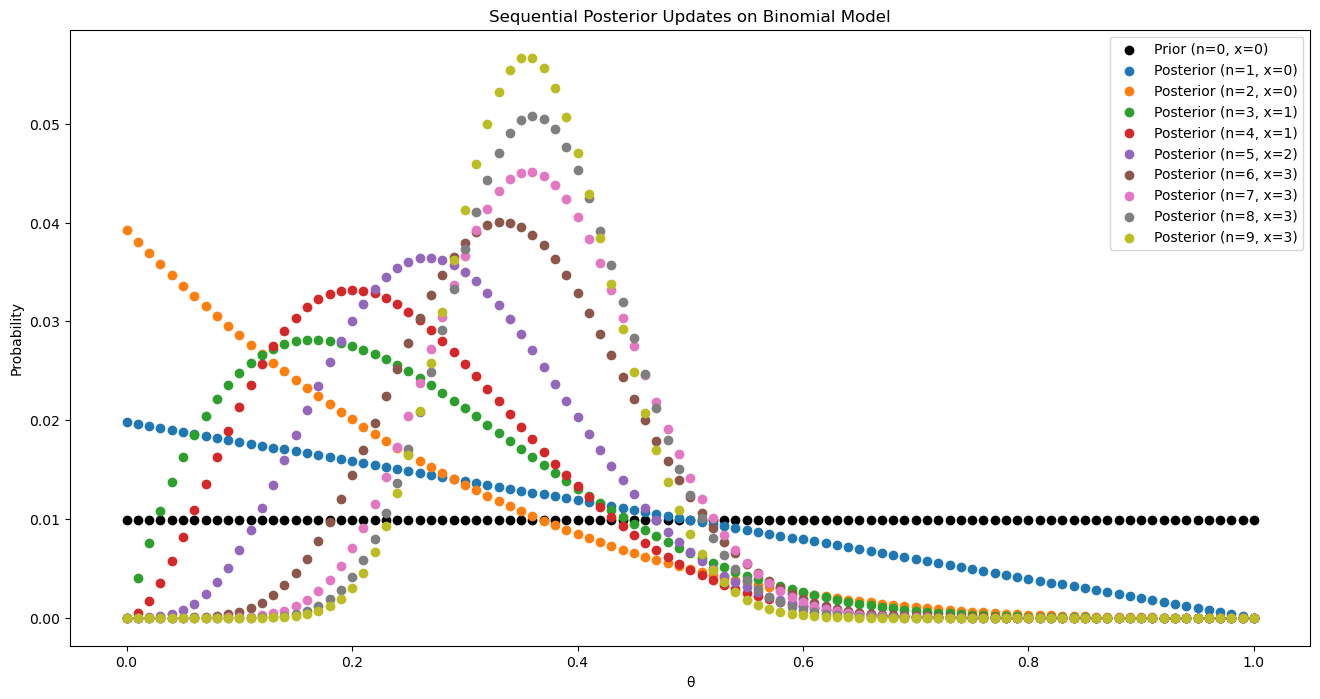

In [1]:

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0, 1, 101)

prior = np.ones(101) / 101 

observations = 0, 0, 1, 0, 1, 1, 0, 0, 0
n, x = 0, 0

plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label=f"Prior (n={n}, x={x})", color="k")

# Sequentially update the posterior
for observation in observations:
    n += 1 
    x += observation

    likelihood = parameter_domain**x * (1 - parameter_domain)**(n - x)
    posterior = likelihood * prior
    posterior /= posterior.sum()  # Normalize so that all points sum to 1
    
    prior = posterior
    
    plt.scatter(parameter_domain, posterior, label=f"Posterior (n={n}, x={x})")

plt.title("Sequential Posterior Updates on Binomial Model")
plt.xlabel("θ")
plt.ylabel("Probability")
plt.legend()
plt.show()


## Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*



&nbsp;


(The Thompson Sampling strategy is **provably optimal** under reasonable conditions.)

If the prior is well-behaved, then the posterior probability distribution follows the Bernstein-von Mises theorem, meaning that posterior distributions will concentrate around the true parameter as the number of observations grows.


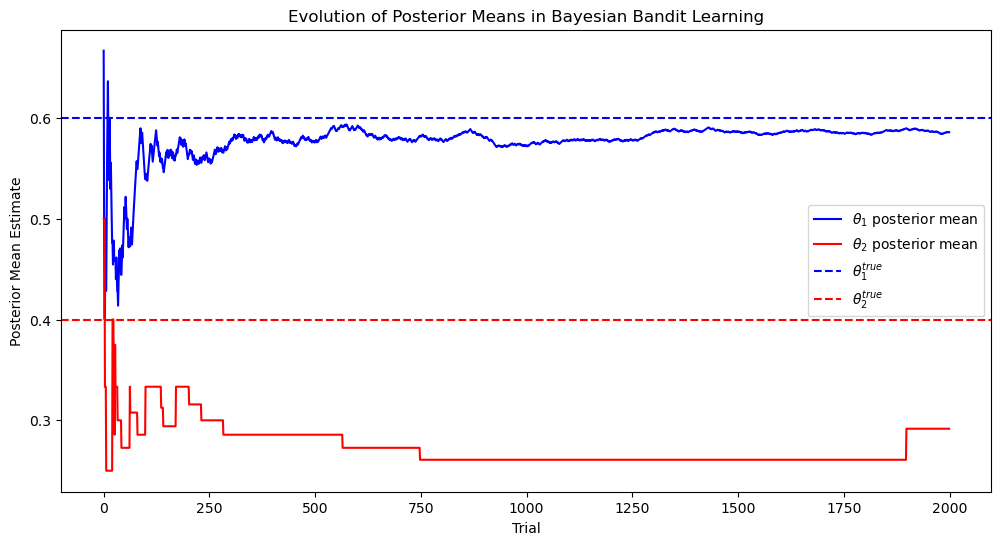

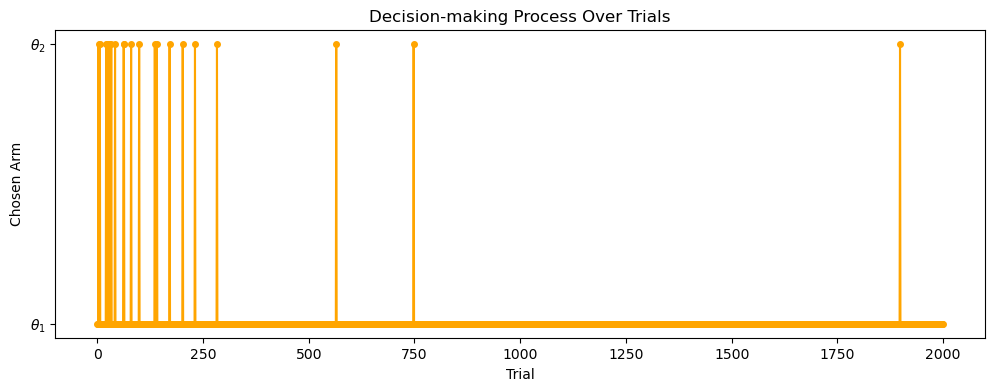

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

theta1_true = 0.6
theta2_true = 0.4

alpha1, beta1 = 1, 1  # uniform prior for arm 1
alpha2, beta2 = 1, 1  # uniform prior for arm 2

num_trials = 2000

# Track success counts and number of trials for each arm
successes1, trials1 = 0, 0
successes2, trials2 = 0, 0

# Store posterior mean estimates and chosen arms for visualization
posterior_means1 = []
posterior_means2 = []
chosen_arms = []

# Thompson Sampling
for t in range(num_trials):
    # Sample from the posterior distributions for both arms
    sampled_theta1 = np.random.beta(alpha1, beta1)
    sampled_theta2 = np.random.beta(alpha2, beta2)

    # Select the arm with the higher sampled value
    if sampled_theta1 > sampled_theta2:
        chosen_arm = 1
        reward = np.random.rand() < theta1_true  # Simulated outcome for arm 1
        successes1 += reward
        trials1 += 1
        alpha1 += reward  # Update Beta posterior
        beta1 += 1 - reward
    else:
        chosen_arm = 2
        reward = np.random.rand() < theta2_true  # Simulated outcome for arm 2
        successes2 += reward
        trials2 += 1
        alpha2 += reward  # Update Beta posterior
        beta2 += 1 - reward

    # Store posterior mean estimates for visualization
    posterior_means1.append(alpha1 / (alpha1 + beta1))
    posterior_means2.append(alpha2 / (alpha2 + beta2))
    chosen_arms.append(chosen_arm)

# Evolution of posterior means
plt.figure(figsize=(12, 6))
plt.plot(range(num_trials), posterior_means1, label=r'$\theta_1$ posterior mean', color='b')
plt.plot(range(num_trials), posterior_means2, label=r'$\theta_2$ posterior mean', color='r')
plt.axhline(y=theta1_true, linestyle='--', color='b', label=r'$\theta_1^{true}$')
plt.axhline(y=theta2_true, linestyle='--', color='r', label=r'$\theta_2^{true}$')
plt.xlabel("Trial")
plt.ylabel("Posterior Mean Estimate")
plt.title("Evolution of Posterior Means in Bayesian Bandit Learning")
plt.legend()
plt.show("jpg")

# Decision-making process over trials
plt.figure(figsize=(12, 4))
plt.plot(range(num_trials), chosen_arms, 'o-', markersize=4, color='orange')
plt.yticks([1, 2], [r'$\theta_1$', r'$\theta_2$'])
plt.xlabel("Trial")
plt.ylabel("Chosen Arm")
plt.title("Decision-making Process Over Trials")
plt.show("jpg")


## Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

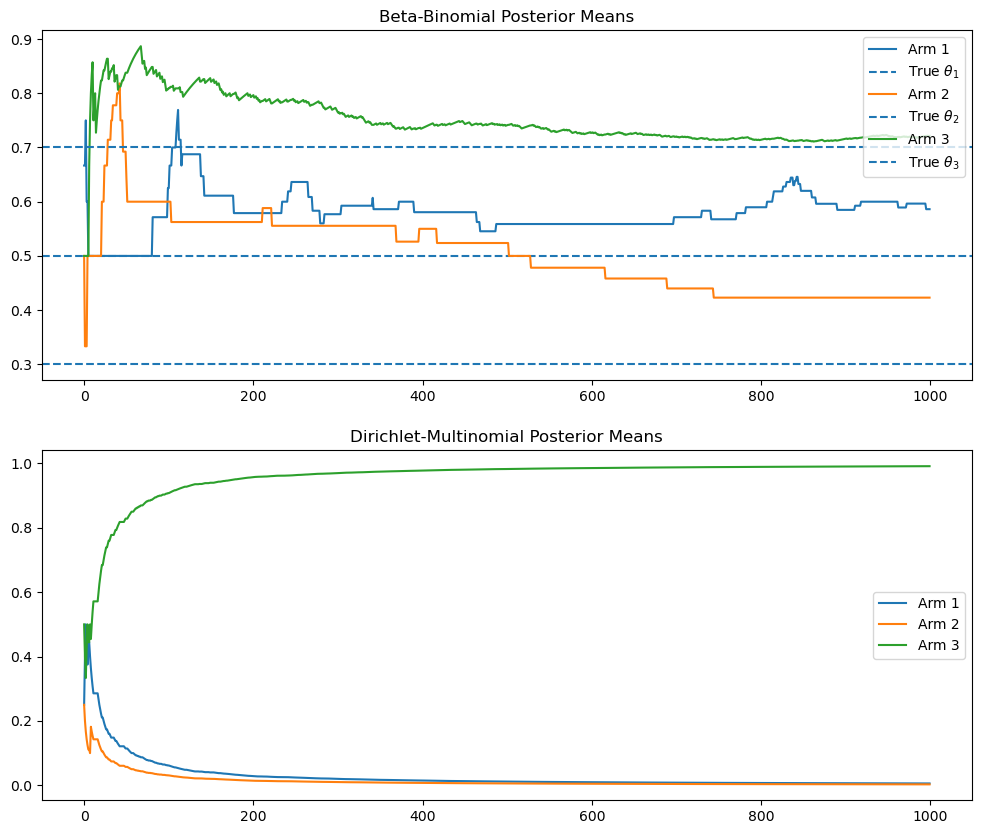

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

theta_true = np.array([0.5, 0.3, 0.7])
num_trials = 1000

# Initialize Beta-Binomial priors
alpha_beta = np.ones(3)
beta_beta = np.ones(3)

# Initialize Dirichlet-Multinomial prior
alpha_dirichlet = np.ones(3)

posterior_means_beta = np.zeros((num_trials, 3))
posterior_means_dirichlet = np.zeros((num_trials, 3))
chosen_arms_beta = []
chosen_arms_dirichlet = []

for t in range(num_trials):
    # Beta-Binomial (independent Updates)
    sampled_theta_beta = np.array([np.random.beta(alpha_beta[i], beta_beta[i]) for i in range(3)])
    chosen_arm_beta = np.argmax(sampled_theta_beta)
    reward_beta = np.random.rand() < theta_true[chosen_arm_beta]
    alpha_beta[chosen_arm_beta] += reward_beta
    beta_beta[chosen_arm_beta] += 1 - reward_beta
    posterior_means_beta[t, :] = alpha_beta / (alpha_beta + beta_beta)
    chosen_arms_beta.append(chosen_arm_beta)

    # Dirichlet-Multinomial (joint Updates)
    sampled_theta_dirichlet = np.random.dirichlet(alpha_dirichlet)
    chosen_arm_dirichlet = np.argmax(sampled_theta_dirichlet)
    reward_dirichlet = np.random.rand() < theta_true[chosen_arm_dirichlet]
    alpha_dirichlet[chosen_arm_dirichlet] += reward_dirichlet
    posterior_means_dirichlet[t, :] = alpha_dirichlet / np.sum(alpha_dirichlet)
    chosen_arms_dirichlet.append(chosen_arm_dirichlet)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Beta-Binomial Posterior
for i in range(3):
    axes[0].plot(range(num_trials), posterior_means_beta[:, i], label=f'Arm {i+1}')
    axes[0].axhline(y=theta_true[i], linestyle='--', label=f'True $θ_{i+1}$')
axes[0].set_title("Beta-Binomial Posterior Means")
axes[0].legend()

# Dirichlet-Multinomial Posterior
for i in range(3):
    axes[1].plot(range(num_trials), posterior_means_dirichlet[:, i], label=f'Arm {i+1}')
axes[1].set_title("Dirichlet-Multinomial Posterior Means")
axes[1].legend()

plt.show("jpg")

The first figure shows that each arm’s posterior mean will gradually converges toward its true probability, though the rate of convergence varies heavily depending on how often the arm is selected. By the nature of Thompson Sampling, early fluctuations are evident, but eventually, the best-performing arm stabilizes near its true value. The two other arms, though still updated occasionally, receive significantly fewer updates as the algorithm prioritizes the arm with the highest expected reward.

The second figure shows that unlike the Beta-Binomial approach, here, probability mass is redistributed across all arms at each update. As a result, one arm dominates much faster, leading to a sharp reduction in the estimated probabilities of the other two arms. The model quickly shifts towards exploitation, committing to one arm while nearly disregarding the others. This behavior explains why the estimated probability for the best arm does not precisely match its true value—once the algorithm strongly favors one arm, the competition among arms prevents further refinement of its estimate.

In the context of AB testing, the primary goal is to select the best-performing option (and of course, as efficiently as possible). So the Dirichlet-Multinomial model appears to be the more appropriate choice in many scenarios. The model is mostly able to rapidly identify and commit to the best arm, minimizing wasted trials on suboptimal options. Due to competition among arms, it allocates resources to the best choice much faster, and by the end of the trials, the chosen arm will absorb nearly all the probability mass, making it visually obvious which one is the best.

One example is online advertising, where different ads are tested, and the goal is to maximize engagement or conversions. Advertisers often run multiple ad variations simultaneously, with the objective being to determine which ad drives the highest click rate or conversion rate. The Dirichlet-Multinomial model is particularly effective in this setting because it quickly shifts budget and impressions to the best-performing one, instead of continuing exploring all options for a longer period, as in the Beta-Binomial case. This is especially valuable in time-sensitive campaigns, such as flash sales or short-term promotions, where advertisers need to capitalize on the most effective ad immediately.

For cases where accurate probability estimation is necessary (at least for the best arm), or where options are *independent* and do not directly compete, the Beta-Binomial model provides a more balanced approach. This is useful in medical trials, where treatments should be fairly evaluated before drawing conclusions. But in most cases, only the best arm’s estimate converges to its true value, as it gets selected more often. Weaker arms will have much more biased estimates due to fewer updates. Exploration remains essential to avoid premature commitment. Additionally, traditional AB testing benefits from this model when long-term performance matters.